Continuamos con el modelo __Support Vector Machine__:

_Support Vector Machine_ es un modelo supervisado de aprendizaje con algoritmos asociados que analizan los datos y reconocen patrones, que se utiliza para la clasificación y el análisis de regresión. Este refleja en el espacio todos los puntos de la muestra realizando finalmente una división mediante una recta o un plano. 

# Librerías

In [27]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import random 
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle # guardar modelos

Cargamos el dataset:

In [3]:
LOAN_var_norm = pd.read_csv('../data/intermediate/LOAN_var_norm.csv', delimiter =",")
LOAN_var_norm

,"('annual_inc',)","('dti',)","('emp_length',)","('int_rate',)","('loan_amnt',)","('mort_acc',)","('open_acc',)","('pub_rec_bankruptcies',)","('revol_bal',)","('revol_util',)",...,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_36,term_60,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,1.601835,-0.157682,0.081610,-1.321041,-0.351811,0.157875,1.502962,2.145481,-0.154017,-1.274923,...,0,0,0,0,0,1,0,1,0,0
1,-0.489987,-1.409073,-0.961618,2.592857,-0.866473,-0.915189,-1.428406,-0.372109,-0.932286,1.921663,...,0,0,0,0,0,1,0,0,1,0
2,0.984698,-0.601169,0.342417,-1.321041,-0.831182,1.230939,1.319751,-0.372109,0.738413,-1.086148,...,0,0,0,0,0,1,0,1,0,0
3,-0.417387,-0.946104,0.342417,0.618016,-0.537090,-0.915189,0.586909,4.663070,-0.509064,-1.388188,...,0,0,0,0,0,0,1,0,1,0
4,0.268369,-0.860157,0.342417,0.618016,-0.066541,-0.378657,-1.428406,-0.372109,-1.177864,1.548308,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442562,-1.756702,0.998595,1.124838,0.521846,-0.351811,-0.915189,-0.512354,-0.372109,0.520341,0.499560,...,0,0,0,0,0,1,0,0,0,1
442563,-0.057731,0.610113,-1.483232,-0.283299,-0.301816,-0.378657,0.220488,-0.372109,0.648895,0.696725,...,0,0,0,0,0,1,0,0,0,1
442564,-1.157084,1.436353,-0.179197,0.611307,-0.184178,-0.915189,-0.512354,2.145481,0.072311,0.344345,...,0,0,0,0,0,0,1,0,0,1
442565,-0.016623,1.011200,-1.222425,1.505912,-0.301816,-0.915189,0.953330,-0.372109,-0.185316,-0.943518,...,0,0,0,0,0,0,1,0,1,0


# Train y Test

Lo hacemos con 100.000 datos, porque obtenemos el mismo accuracy que con más y el coste computacional es menor. 

In [4]:
data_train1 = LOAN_var_norm.sample(n=100000, random_state=1234)

In [ ]:
data_train1.info()

In [5]:
Y = data_train1['Charged_off']
X = data_train1.drop(['Charged_off'], axis = 1)

In [6]:
# Vemos que no está 'Charged _off'
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 271013 to 53306
Data columns (total 72 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ('annual_inc',)                      100000 non-null  float64
 1   ('dti',)                             100000 non-null  float64
 2   ('emp_length',)                      100000 non-null  float64
 3   ('int_rate',)                        100000 non-null  float64
 4   ('loan_amnt',)                       100000 non-null  float64
 5   ('mort_acc',)                        100000 non-null  float64
 6   ('open_acc',)                        100000 non-null  float64
 7   ('pub_rec_bankruptcies',)            100000 non-null  float64
 8   ('revol_bal',)                       100000 non-null  float64
 9   ('revol_util',)                      100000 non-null  float64
 10  ('total_acc',)                       100000 non-null  float64
 11  applicati

In [7]:
Y.tail()

236318    0
9365      0
205082    0
233901    1
53306     1
Name: Charged_off, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [11]:
x_train.shape

(70000, 72)

In [12]:
x_test.shape

(30000, 72)

In [13]:
y_train.head()

331201    0
94466     0
254242    0
69411     0
279932    1
Name: Charged_off, dtype: int64

Hacemos _undersampling_ porque tenemos datos de sobra como para hacer oversampling. Lo que queremos es bajar la clase que tiene más cantidad, a la que tiene menos. 

Haremos undersampling de los datos de nuestra muestra para balancearlos:

In [14]:
undersample = RandomUnderSampler(sampling_strategy = 'majority')

In [15]:
x_under, y_under = undersample.fit_sample(x_train, y_train)

In [16]:
x_under.shape

(30720, 72)

In [17]:
y_under.shape

(30720,)

## SVM

In [18]:
SVM = SVC(kernel='rbf',
          tol=0.01, 
          C=1, random_state=1234)

In [19]:
SVM.fit(x_under, y_under)

SVC(C=1, random_state=1234, tol=0.01)

In [20]:
SVM.score(x_under, y_under)

0.6819010416666667

In [21]:
SVM_predicted = SVM.predict(x_test)

In [22]:
SVM.score(x_test, y_test)

0.6418

In [ ]:
conf_matrix = confusion_matrix(y_test, SVM_predicted)

In [23]:
print(conf_matrix)

[[14810  8615]
 [ 2131  4444]]


In [ ]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [24]:
print(classification_report(y_test, SVM_predicted))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73     23425
           1       0.34      0.68      0.45      6575

    accuracy                           0.64     30000
   macro avg       0.61      0.65      0.59     30000
weighted avg       0.76      0.64      0.67     30000



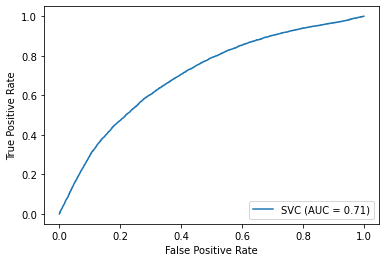

In [25]:
metrics.plot_roc_curve(SVM, x_test, y_test)
plt.show()

__Vemos que el accuracy no mejora, se mantiene en 0.64, bien sea cogiendo una muestra de 10.000 datos, de 100.000 o una de 300.000.__

Además, la precisión de los que pagan es de 0.34, lo cual nos parece bajo, pero no hemos conseguido aumentarlo. 

### Búsqueda Grid

A continuación se adjuntará el código de la parte realizada con el support vector machine, en la cual se ve reflejada la realización de de la busqueda grid para escoger de una manera correcta los hiper parámetros. 

In [28]:
# probamos con kernel radial solo y ya nos tarda mucho
# dejamos el gamma por defecto (no lo ponemos)
# metemos 5 en el parametro de regularizacion
# njobs = 3 para usar 3 procesadores
 
param_grid = {'C': [0.1, 10, 100],
              'gamma' : [0.001, 0.0001],
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs = 3)
grid.fit(x_under, y_under) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed: 42.0min finished


GridSearchCV(estimator=SVC(), n_jobs=3,
             param_grid={'C': [0.1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
# para ver cuál es el mejor modelo
print(grid.best_estimator_) 
# SVC(C=10, gamma=0.0001)

SVC(C=10, gamma=0.0001)


In [30]:
# guardamos el mejor modelo
SVM_Best = grid.best_estimator_

In [31]:
grid_predictions = SVM_Best.predict(x_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74     23425
           1       0.34      0.67      0.45      6575

    accuracy                           0.64     30000
   macro avg       0.61      0.65      0.59     30000
weighted avg       0.75      0.64      0.67     30000



In [ ]:
metrics.plot_roc_curve(SVM_Best, x_test, y_test)
plt.show()

__Después de hacer el grid__ hemos obtenido un accuracy ligeramente mayor, del __66%.__

In [ ]:
# guardamos el modelo:
nombre = 'SupportVM.sav'
pickle.dump(RF, open(nombre, 'wb'))